Generar imagen, a partir de un modelo DEM

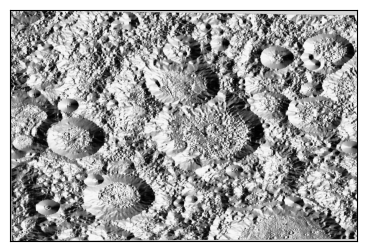

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.animation import FuncAnimation

# Get the data Folder with images

fold_img = r"D:\Tesis maestria\Luna\GIS\DEM"  # Agrega 'r' al principio para tratar la cadena como una cadena cruda


dem_moon = os.path.join(fold_img, "Garavito_zone_LOLA.tif")


# Open the DEM with Rasterio


with rio.open(dem_moon) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    #elevation[elevation < 2000] = np.nan

hillshade_moon = es.hillshade(elevation, azimuth=90, altitude=30)

 # Plot the hillshade layer with the modified angle altitude
ep.plot_bands(
    hillshade_moon,
    cbar=False,
    # title="Hillshade with azimuth and altitude}",
    figsize=(5, 3),
)

plt.show()

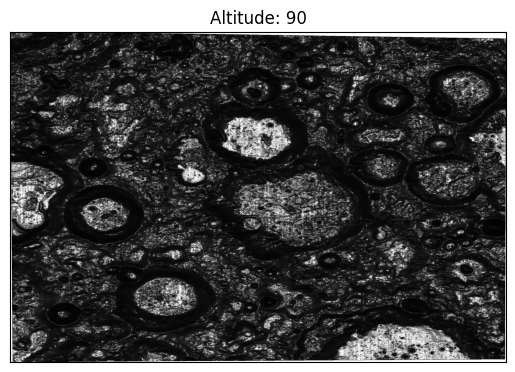

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.animation import FuncAnimation

# Get the data Folder with images
fold_img = r"D:\Tesis maestria\Luna\GIS\DEM"  # Agrega 'r' al principio para tratar la cadena como una cadena cruda
dem_moon = os.path.join(fold_img, "Garavito_zone_LOLA.tif")

# Open the DEM with Rasterio
with rio.open(dem_moon) as src:
    elevation = src.read(1)

# Configuración de azimut y altitud
azimuth = [90]
altitude = np.arange(90, -1, -5)  # Decreciendo de 90 a 0

# Configuración de la figura y el eje
fig, ax = plt.subplots()


def update(i):
    ax.clear()
    # Adjust the azimuth value
    hillshade_moon = es.hillshade(elevation, azimuth=azimuth[0], altitude=altitude[i])
    # Plot the hillshade layer with the modified angle altitude
    ep.plot_bands(
        hillshade_moon,
        cbar=False,
        # title="Hillshade with azimuth and altitude",
        figsize=(5, 3),
        ax=ax,
    )
    ax.set_title(f"Altitude: {altitude[i]}")


# Generar animación
ani = FuncAnimation(fig, update, frames=len(altitude), interval=500)

# Guardar animación como video
ani.save("hillshade_animation.mp4", writer="ffmpeg")

plt.show()

In [ ]:
import os
import sys
import subprocess
from pathlib import Path
from osgeo import gdal

grass_call = "grass84"
sys.path.append(
    subprocess.check_output(
        [grass_call, "--config", "python_path"], text=True, shell=True
    ).strip()
)


# Configuración del entorno GRASS GIS
os.environ["GISBASE"] = r"C:\OSGeo4W\apps\grass\grass84"  # Ruta a GRASS GIS
os.environ["PATH"] += r";C:\OSGeo4W\apps\grass\grass84\bin"
os.environ["LD_LIBRARY_PATH"] = r"C:\OSGeo4W\apps\grass\grass84\lib"
os.environ["GRASS_SH"] = r"C:\OSGeo4W\apps\grass\grass84\etc\shells\sh.exe"
os.environ["GRASS_GUI"] = "wxpython"  # o 'text' si prefieres la terminal

# Inicializa GRASS GIS
sys.path.append(os.path.join(os.environ["GISBASE"], "etc", "python"))
# import GRASS GIS python packages
import grass.script as gs
import grass.jupyter as gj

In [5]:
# Create a project in the temporary directory
path_name = r"D:\Tesis_GIS_Luna\Luna\GIS\DEM"
print(f"Proyecto GRASS creado en: {path_name}")
# Iniciar sesión en la ubicación recién creada
session = gj.init(Path(path_name, "shadow_analysis"))
print("Sesión GRASS inicializada.")

Proyecto GRASS creado en: D:\Tesis_GIS_Luna\Luna\GIS\DEM
Sesión GRASS inicializada.


In [7]:
# Ejecutar el comando r.in.gdal
gs.run_command(
    "r.in.gdal",
    input=r"D:\Tesis_GIS_Luna\Luna\GIS\DEM\CE1_GRAS_DOM_120m_001_GLOBAL_A\global-DOM-garavito.tif",
    output="ortophoto_garavito",
    overwrite=True,
    #flags="o",
)
gs.run_command(
    "r.in.gdal",
    input=r"D:\Tesis_GIS_Luna\Luna\GIS\DEM\CHANG-E_DEM_500_m_GARAVITO_ZONE.tif",
    output="dem_garavito",
    overwrite=True,
    # flags="o",
)
print("Layers cargado con éxito")

Layers cargado con éxito


In [82]:
# Ejecutar el comando r.sunmask con los parámetros especificados
gs.run_command(
    "r.sunmask",
    elevation="dem_garavito",  # Nombre del mapa de elevación importado previamente
    output="shadow_map",  # Nombre del mapa de salida para las sombras
    altitude=5,  # Altura del sol en grados
    azimuth=90,  # Azimut del sol en grados
)
gs.run_command(
    "r.colors",
    map="shadow_map",  # El nombre de tu mapa de sombras
    color="grey255",  # Usar una paleta de grises
)

In [84]:
gs.run_command(
    "r.out.gdal",
    input="shadow_map",  # Mapa que deseas guardar
    output=r"D:\Tesis_GIS_Luna\Luna\GIS\DEM\shadow_analysis",  # Ruta de salida
    format="GTiff",  # Formato TIFF
    overwrite=True,  # Permite sobrescribir el archivo si ya existe
)

ERROR 4: Attempt to create new tiff file `D:\Tesis_GIS_Luna\Luna\GIS\DEM\shadow_analysis' failed: Permission denied
Checking GDAL data type and nodata value...
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
Using GDAL data type <Byte>
Input raster map contains cells with NULL-value (no-data). The value 255
will be used to represent no-data values in the input map. You can specify
a nodata value with the nodata option.
ERROR: Unable to create <D:\Tesis_GIS_Luna\Luna\GIS\DEM\shadow_analysis>
       dataset using <GTiff> driver


CalledModuleError: Module run `r.out.gdal --o input=shadow_map output=D:\Tesis_GIS_Luna\Luna\GIS\DEM\shadow_analysis format=GTiff` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

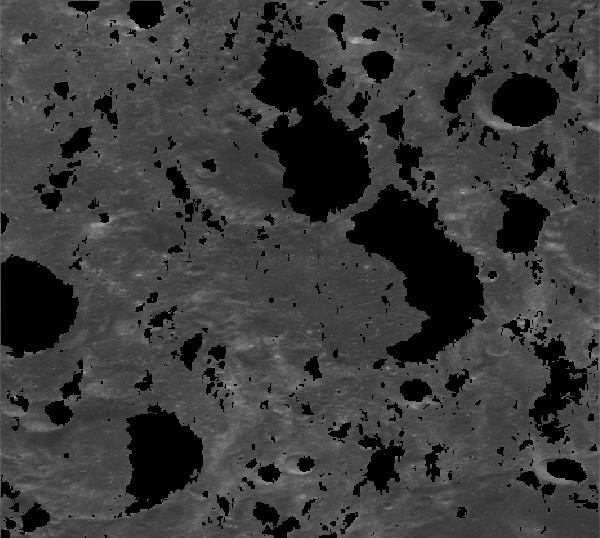

In [72]:
# Create Map instance
img = gj.Map()
# Add a raster
img.d_rast(map="ortophoto_garavito",)
img.d_rast(map="shadow_map")
# Add legend
# Display map
img.show()